In [1]:
!pip install -q requests
!pip install -q html5lib
!pip install -q bs4
!pip install -q nltk
!pip install -q spacy
!pip install -q pandas

In [2]:
import nltk
import spacy
nltk.download("stopwords")

import subprocess

#Run the command to download the spaCy model
try:
    subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"], check=True)
    print("en_core_web_sm model downloaded successfully.")
except subprocess.CalledProcessError:
    print("Error: Failed to download the en_core_web_sm model.")

import requests
from requests.adapters import HTTPAdapter
# from urllib3.util.retry import Retry

import requests
from bs4 import BeautifulSoup

import math

import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
#Download the Punkt tokenizer models
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


en_core_web_sm model downloaded successfully.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Getting all the faculty links

In [ ]:
url = "https://www.iisermohali.ac.in/faculty/people/faculty"

r = requests.get(url,  verify = False)
htmlContent = r.content
# print(htmlContent)

# Step 2: Parse the HTML
soup = BeautifulSoup(htmlContent, 'html.parser')

# Get the title of the HTML page
title = soup.title

# Get all the paragraphs from the page
paras = soup.find_all('p')

#to get the faculty hyperlinks by findng anchor elements
anchor = soup.find_all('a')
anchor

#to get all the anchors which have hyperlinks
all_links = soup.find_all("a", href=True)


In [ ]:
#to find research area. Every 6th td starting from 4th
Research_Area = []
prof_RA = soup.find_all('td')
for i in range(4,len(prof_RA),6):
    RA = (prof_RA[i].get_text())
    if RA not in ['-', 'E. coli Genetics and Physiology']: #gowrishankar and kinjalk names and sites missing
        Research_Area.append(RA)
        if RA == 'Geomorphology, Remote Sensing and GIS, Disaster Mitigation':
            break

print(len(Research_Area))

106


In [ ]:
#searching the hyperlinks of faculty from all the hyperlinks
#create a list of faculty hyperlinks
#create a list of faculty names
faculty_links = []
faculty_names = []

for link in all_links:
    href = link['href']
    if href.startswith("/faculty/") and "faculty/people/faculty" not in href:
        name = link.get_text()
        faculty_links.append(href)
        faculty_names.append(name)
        if name == 'Yunus Ali Pulpadan':
            break

# for info in faculty_links:
#     print(info)
# print(faculty_names)


Getting keywords using word-count

In [ ]:
#using word-count

faculty_keywords = []

departments = []
updated_time = []

for number , i in enumerate(faculty_links):

    n = number/ len(faculty_links)*100
    if math.floor(n)%10 == 0:
        print("---",math.floor(n),"percent completed","---")

    departments.append(i[9:12])

    r_faculty = requests.get('https://www.iisermohali.ac.in' + i ,  verify = False)
    htmlContent_faculty = r_faculty.content
    # print(htmlContent)

    # Parse the HTML
    soup_faculty = BeautifulSoup(htmlContent_faculty, 'html.parser')
    time = soup_faculty.find_all("time")
    updated_time.append(time[0].get_text().replace("\n","").replace("\t",""))



    paragraphs = soup_faculty.find_all('p') #to find all the academic contents of the page written in paragraphs

    # for p in paragraphs:
    #     if str(p).find("justify") != -1:
    #         print(p.get_text())

    text = ' '.join([p.get_text() for p in paragraphs])
    text = text.lower()  # Convert to lowercase

    # NLP Analysis (Part-of-Speech Tagging and Named Entity Recognition)
    doc = nlp(text)

    # Count Word Frequencies
    filtered_words = [token.text for token in doc if not token.is_stop and token.is_alpha]
    word_freq = Counter(filtered_words)

    # Keyword Identification
    num_keywords = 10  # Set the number of top keywords you want to identify
    keywords = [word for word, freq in word_freq.most_common(num_keywords)]



    # Sense-Making - Analyze context, or proceed with further analysis as needed

    # Print Keywords
    #print(faculty_names[faculty_links.index(i)])
    #print("Top Keywords:")
    single_faculty_keywords = []
    for keyword in keywords:
       if keyword not in ['iiser', 'research', 'mohali', 'knowledge', 'po', 'sector', 'sas', 'nagar', '81', 'manauli', 'indian', 'city', 'education', 'pursuit', 'mathematical', 'sciences', 'work', 'telefax', 'web', 'queries', 'mail', 'copyright', 'facility', 'email', 'phone', '+91', 'fax', '+91', 'personal', 'page'  ]:
            #print(f"{keyword}: {word_freq[keyword]} times")
            single_faculty_keywords.append(keyword) #for removing unwanted keywords
    if not single_faculty_keywords: #if final keywords list remains empty, change the method of keyword identification
        keywords = [token.text for token in doc if token.pos_ in ['NOUN', 'ADJ']]
        for keyword in keywords:
              if keyword not in ['iiser', 'research', 'mohali', 'knowledge', 'po', 'sector', 'sas', 'nagar', '81', 'manauli', 'indian', 'city', 'education', 'pursuit', 'mathematical', 'sciences', 'work', 'telefax', 'web', 'queries', 'mail', 'copyright', 'facility', 'email', 'phone', '+91', 'fax', '+91', 'personal', 'page'  ]:
                    single_faculty_keywords.append(keyword)
    faculty_keywords.append(single_faculty_keywords)  #for keywords of all faculty
    #print('-----------------')

    # print(single_faculty_keywords)

#print(faculty_keywords)


--- 0 percent completed ---
--- 0 percent completed ---
--- 10 percent completed ---
--- 20 percent completed ---
--- 30 percent completed ---
--- 40 percent completed ---
--- 50 percent completed ---
--- 50 percent completed ---
--- 60 percent completed ---
--- 70 percent completed ---
--- 80 percent completed ---
--- 90 percent completed ---


In [ ]:
print(len(faculty_names))
print(len(Research_Area))
print(len(faculty_keywords))

106
106
106


Getting keywords usinf TF-IDF

In [ ]:
#Using tf-idf.
%pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
faculty_keywords_tfidf = []

for i in faculty_links:
    r_faculty = requests.get('https://www.iisermohali.ac.in' + i ,  verify = False)
    htmlContent_faculty = r_faculty.content

    # Parse the HTML
    soup_faculty = BeautifulSoup(htmlContent_faculty, 'html.parser')
    paragraphs = soup_faculty.find_all('p') #to find all the academic contents of the page written in paragraphs
    text = ' '.join([p.get_text() for p in paragraphs])
    text = text.lower()  # Convert to lowercase

    #print(soup_faculty)

    single_faculty_keywords_tfidf = []

    # Create a TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform([text])

    # Get the feature names (words)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Find keywords with high TF-IDF scores
    keywords_tfidf = [feature_names[i] for i in tfidf_matrix.sum(axis=0).argsort()]
    keywords_list_tfidf = keywords_tfidf[0].tolist()
    keywords_sublist_tfidf = keywords_list_tfidf[0]
    for keyword_tfidf in keywords_sublist_tfidf:
       if keyword_tfidf not in ['iiser', 'research', 'mohali', 'knowledge', 'po', 'sector', 'sas', 'nagar', '81', 'manauli', 'indian', 'city', 'education', 'pursuit', 'mathematical', 'sciences', 'work', 'telefax', 'web', 'queries', 'mail', 'copyright', 'facility', 'email', 'phone', '+91', 'fax', '+91', 'personal', 'page', 'iiserm', 'iisermohali'  ]:

            single_faculty_keywords_tfidf.append(keyword_tfidf) #for removing unwanted keywords

    faculty_keywords_tfidf.append(single_faculty_keywords_tfidf)
    # Print Keywords
    # print(faculty_names[faculty_links.index(i)])
    # print(single_faculty_keywords_tfidf)


In [ ]:
import pandas as pd

data = {
    'Faculty Name': faculty_names ,
    'Research Area': Research_Area,
    'Keywords': faculty_keywords,
    'Keywords_tfidf' : faculty_keywords_tfidf,
    'Updated Time': updated_time,
    'Department': departments
}

# Create a DataFrame from a dictionary
df = pd.DataFrame(data)

# Display the DataFrame
df.to_csv("IISER_df")
df

,Faculty Name,Research Area,Keywords,Keywords_tfidf,Updated Time,Department
0,Abhik Ganguli,Number Theory,"[p, mod, representations, galois, modular, local]","[ghate, hilbert, hosting, weights, institute, ...",25 May 2017,dms
1,Abhishek Chaudhuri,Condensed Matter Theory : Soft and Biological ...,"[equilibrium, cell, dynamics, condensed, matte...","[webmaster, matterthe, stresses, material, stu...",05 July 2018,dps
2,Adrene Freeda D 'cruz,Postwar American Literature,"[science, adrene, dcruz, american, theatre, fi...","[114, noteworthy, louis, long, literary, libra...",24 June 2020,hss
3,Alok Kumar Maharana,Algebraic Geometry,"[complex, open, algebraic, surfaces, linear, s...","[maharanaassistant, webmaster, open, professor...",09 May 2023,dms
4,Amit Kulshrestha,Algebra,"[algebras, algebraic, central, simple, quadrat...","[worked, sites, linear, laws, kulshrestha, sof...",14 August 2019,dms
...,...,...,...,...,...,...
101,Vinayak Sinha,"Atmospheric Chemistry & Emissions, Source appo...","[sinha, air, kumar, emissions, ambient, atmosp...","[induced, levels, mahata, mahogany, main, majo...",09 May 2023,ees
102,Vishal Bhardwaj,Experimental High Energy Physics: Exotic parti...,[physics],"[kek, involved, japan, model, new, order, part...",07 December 2020,dps
103,Yashonidhi Pandey,Algebraic Geometry,"[professor, hosting, iiserm, computing]","[science, related, professor, pandeyassistant,...",25 May 2017,dms
104,Yogesh Singh,Strongly Correlated Electron Systems/ Crystal ...,"[materials, new, electronic, strongly, correla...","[proximity, property, professor, pressure, pot...",04 August 2021,dps


Data Analysis:

In [ ]:
import pandas as pd
df = pd.read_csv("IISER_df.csv")

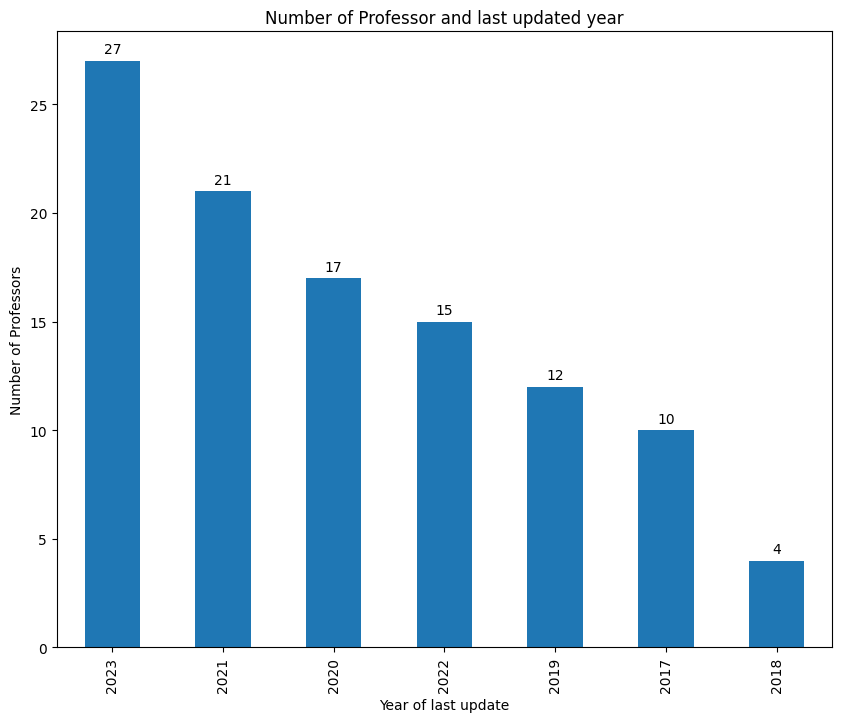

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a column "Updated Time"
# Extract years from the "Updated Time" column
years = [i[-4:] for i in df["Updated Time"]]

# Create a DataFrame with the extracted years
years_df = pd.DataFrame({"year": years})

# Count occurrences of each year
Year_of_last_update = years_df["year"].value_counts()

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
bars = Year_of_last_update.plot(kind='bar', ax=ax)

# Annotate each bar with its count value
for bar in bars.patches:
    yval = bar.get_height()
    ax.annotate(f'{yval}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel('Year of last update')
plt.ylabel('Number of Professors')
plt.title('Number of Professor and last updated year')
plt.show()


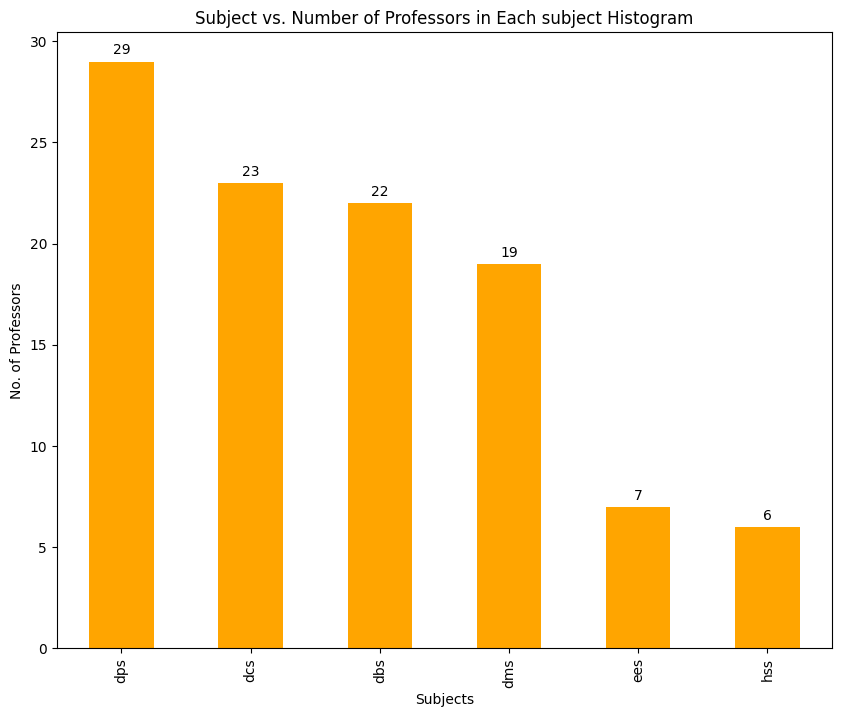

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a column "Department"
# Count occurrences of each department
departments = df["Department"].value_counts()

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
bars = departments.plot(kind='bar', ax=ax, color='orange')

# Annotate each bar with its count value
for bar in bars.patches:
    yval = bar.get_height()
    ax.annotate(f'{yval}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# plt.title('No of Professors in Each Department')

# Add labels and a title
plt.xlabel('Subjects')
plt.ylabel('No. of Professors')
plt.title('Subject vs. Number of Professors in Each subject Histogram')
plt.show()



List of Topics Available in IISER Mohali

In [ ]:
import pandas as pd

# Load the csv file
df = pd.read_csv('IISER_df.csv')

# List of unique departments
departments = df['Department'].unique()


# Iterate over each department
for department in departments:
    # Create a separate dataframe for the current department
    current_department_df = df[df['Department'] == department]

    # Get the unique Research Areas for the current department
    current_areas = current_department_df['Research Area'].unique()

    # Count the occurrence of each research area in the current department
    current_area_counts = current_department_df['Research Area'].value_counts()

    # Print the results for the current department
    print(current_area_counts, f'{department} Department Research Areas')
    print(' ')

Research Area
Algebraic Geometry                                           5
Number Theory                                                1
Algebra                                                      1
Number theory                                                1
Applications of Homotopical Algebra to Algebraic Geometry    1
Harmonic Analysis                                            1
Groups and Geometry                                          1
Functional Analysis                                          1
Topology and Groups                                          1
Theoretical and Applied Probability                          1
Geometric Group Theory                                       1
Topology of Real Algebraic Varieties                         1
 Riemannian Geometry                                         1
Lie Algebras and Representation Theory                       1
Differential Algebra                                         1
Name: count, dtype: int64 dms Department 